### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [46]:
#1- A scraping script for getting 10 days weather forecasts of Benguerir city
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests


<Response [200]>

In [5]:
#page1.content


In [103]:
url = "https://weather.com/fr-MA/temps/10jours/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111"
html = urlopen(url)
soup = BeautifulSoup(html)


In [118]:
#print(soup.prettify())

In [105]:
# Getting days
container = soup.find('div', id="WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
days = container.find_all('h3')
get_day = []
get_days = []
for day in days:
    temp = day.find('span')
    if  temp != None:
        if temp.get_text() not in get_day:
            get_day.append(temp.get_text())
get_days=get_day[0:10]
get_days


['ven. 16',
 'sam. 17',
 'dim. 18',
 'lun. 19',
 'mar. 20',
 'mer. 21',
 'jeu. 22',
 'ven. 23',
 'sam. 24',
 'dim. 25']

In [106]:
summar = container.find_all('summary')
def get_day_info(summary):
    data = []
    for divs in summary.find('div').find_all('div'):
        spans = divs.find_all('span')
        for span in spans:
            data.append(span.get_text())

        break
        
    return data

In [108]:
data = [get_day_info(summar[day]) for day in range(10)]
data

[['--', '/11°', '11°', 'Très nuageux', '15%', 'SO 8 km/h'],
 ['19°', '/8°', '8°', 'Peu nuageux', '15%', 'E 12 km/h'],
 ['22°', '/8°', '8°', 'Peu nuageux', '15%', 'ESE 11 km/h'],
 ['23°', '/7°', '7°', 'Plutôt ensoleillé', '7%', 'E 12 km/h'],
 ['23°', '/7°', '7°', 'Peu nuageux', '7%', 'SSO 14 km/h'],
 ['22°', '/7°', '7°', 'Ensoleillé', '7%', 'ENE 13 km/h'],
 ['21°', '/6°', '6°', 'Ensoleillé', '10%', 'ENE 13 km/h'],
 ['22°', '/6°', '6°', 'Ensoleillé', '7%', 'SSO 13 km/h'],
 ['21°', '/7°', '7°', 'Plutôt ensoleillé', '7%', 'S 13 km/h'],
 ['21°', '/8°', '8°', 'Peu nuageux', '10%', 'SSE 15 km/h']]

In [109]:
#2- Let store the data sets into Pandas DataFrame.
import pandas as pd


In [110]:
data = [get_day_info(summar[day]) for day in range(10)]
data

[['--', '/11°', '11°', 'Très nuageux', '15%', 'SO 8 km/h'],
 ['19°', '/8°', '8°', 'Peu nuageux', '15%', 'E 12 km/h'],
 ['22°', '/8°', '8°', 'Peu nuageux', '15%', 'ESE 11 km/h'],
 ['23°', '/7°', '7°', 'Plutôt ensoleillé', '7%', 'E 12 km/h'],
 ['23°', '/7°', '7°', 'Peu nuageux', '7%', 'SSO 14 km/h'],
 ['22°', '/7°', '7°', 'Ensoleillé', '7%', 'ENE 13 km/h'],
 ['21°', '/6°', '6°', 'Ensoleillé', '10%', 'ENE 13 km/h'],
 ['22°', '/6°', '6°', 'Ensoleillé', '7%', 'SSO 13 km/h'],
 ['21°', '/7°', '7°', 'Plutôt ensoleillé', '7%', 'S 13 km/h'],
 ['21°', '/8°', '8°', 'Peu nuageux', '10%', 'SSE 15 km/h']]

In [111]:
dataframe1 = pd.DataFrame(data=data)
dataframe1.drop(1, axis=1, inplace=True)
dataframe1 = pd.concat([pd.DataFrame(data=get_days), dataframe1], axis=1)
dataframe1

,0,0,2,3,4,5
0,ven. 16,--,11°,Très nuageux,15%,SO 8 km/h
1,sam. 17,19°,8°,Peu nuageux,15%,E 12 km/h
2,dim. 18,22°,8°,Peu nuageux,15%,ESE 11 km/h
3,lun. 19,23°,7°,Plutôt ensoleillé,7%,E 12 km/h
4,mar. 20,23°,7°,Peu nuageux,7%,SSO 14 km/h
5,mer. 21,22°,7°,Ensoleillé,7%,ENE 13 km/h
6,jeu. 22,21°,6°,Ensoleillé,10%,ENE 13 km/h
7,ven. 23,22°,6°,Ensoleillé,7%,SSO 13 km/h
8,sam. 24,21°,7°,Plutôt ensoleillé,7%,S 13 km/h
9,dim. 25,21°,8°,Peu nuageux,10%,SSE 15 km/h


In [112]:
columns = ['day', 'tempera_max', 'tempera_min', 'state', 
           'percentage_value', 'wind_speed']
dataframe1.columns = columns
dataframe1

,day,tempera_max,tempera_min,state,percentage_value,wind_speed
0,ven. 16,--,11°,Très nuageux,15%,SO 8 km/h
1,sam. 17,19°,8°,Peu nuageux,15%,E 12 km/h
2,dim. 18,22°,8°,Peu nuageux,15%,ESE 11 km/h
3,lun. 19,23°,7°,Plutôt ensoleillé,7%,E 12 km/h
4,mar. 20,23°,7°,Peu nuageux,7%,SSO 14 km/h
5,mer. 21,22°,7°,Ensoleillé,7%,ENE 13 km/h
6,jeu. 22,21°,6°,Ensoleillé,10%,ENE 13 km/h
7,ven. 23,22°,6°,Ensoleillé,7%,SSO 13 km/h
8,sam. 24,21°,7°,Plutôt ensoleillé,7%,S 13 km/h
9,dim. 25,21°,8°,Peu nuageux,10%,SSE 15 km/h


In [113]:
#1- A scraping script for getting 10 days weather forecasts of Tanjer city
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

url = "https://weather.com/fr-MA/temps/10jours/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c"
html = urlopen(url)
soup = BeautifulSoup(html)
# Getting days
container = soup.find('div', id="WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
days = container.find_all('h3')
get_day = []
get_days = []
for day in days:
    temp = day.find('span')
    if  temp != None:
        if temp.get_text() not in get_day:
            get_day.append(temp.get_text())
get_days=get_day[0:10]

summar = container.find_all('summary')
def get_day_info(summary):
    data = []
    for divs in summary.find('div').find_all('div'):
        spans = divs.find_all('span')
        for span in spans:
            data.append(span.get_text())

        break
    
    return data
data = [get_day_info(summar[day]) for day in range(10)]
dataframe2 = pd.DataFrame(data=data)
dataframe2.drop(1, axis=1, inplace=True)
dataframe2 = pd.concat([pd.DataFrame(data=get_days), dataframe2], axis=1)
columns = ['day', 'tempera_max', 'tempera_min', 'state', 
           'percentage_value', 'wind_speed']
dataframe2.columns = columns
dataframe2

,day,tempera_max,tempera_min,state,percentage_value,wind_speed
0,ven. 16,--,15°,Averses,81%,SO 12 km/h
1,sam. 17,18°,12°,Averses,80%,SO 10 km/h
2,dim. 18,20°,15°,Ensoleillé,14%,E 23 km/h
3,lun. 19,21°,14°,Peu nuageux,12%,E 18 km/h
4,mar. 20,21°,16°,Averses dans l'après-midi,59%,SE 13 km/h
5,mer. 21,19°,13°,Averses dans la matinée,47%,SO 9 km/h
6,jeu. 22,19°,12°,Plutôt ensoleillé,12%,NNE 8 km/h
7,ven. 23,19°,13°,Ensoleillé,12%,S 8 km/h
8,sam. 24,19°,13°,Peu nuageux,24%,S 8 km/h
9,dim. 25,20°,14°,Peu nuageux,24%,ESE 15 km/h


In [114]:
# Use matplotlib library to plot the raining days of the two cities in the same figure.
import matplotlib.pyplot as plt
import numpy as np
dataframe1["state"].value_counts()
dataframe2["state"].value_counts()


Peu nuageux                  3
Averses                      2
Ensoleillé                   2
Averses dans l'après-midi    1
Averses dans la matinée      1
Plutôt ensoleillé            1
Name: state, dtype: int64

In [116]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
dataframe1["state_to_code"] = ord_enc.fit_transform(dataframe1[["state"]])
dataframe2["state_to_code"] = ord_enc.fit_transform(dataframe2[["state"]])

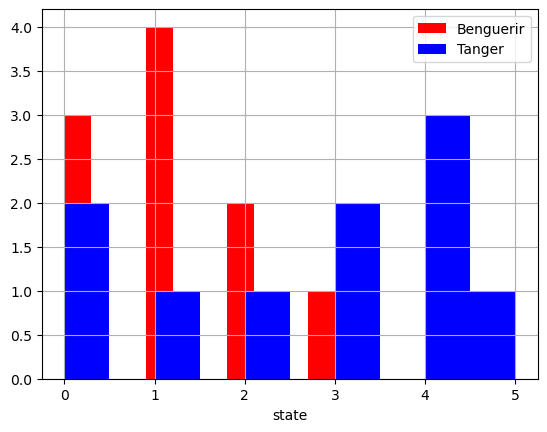

In [117]:
plt.hist(dataframe1['state_to_code'],color='r', label='Benguerir')
plt.hist(dataframe2['state_to_code'],color='b', label='Tanger')
plt.xlabel("state")
plt.legend()
plt.grid()
plt.show() 